In [1]:
import matplotlib.pyplot as plt
import cv2
import random
from glob import glob
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load Data
train_generator = train_datagen.flow_from_directory(
    "train/",
    target_size=(48, 48),
    batch_size=32,
    color_mode="grayscale",
    class_mode="categorical",
    shuffle=True
)

validation_generator = test_datagen.flow_from_directory(
    "val/",
    target_size=(48, 48),
    batch_size=32,
    color_mode="grayscale",
    class_mode="categorical",
    shuffle=False
)

# Model Architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    Flatten(),
    
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    
    Dense(3, activation='softmax')
])

# Compile Model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Callbacks
checkpoint = ModelCheckpoint("model_weights.weights.h5", monitor="val_accuracy",
                             save_weights_only=True, mode="max", verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, min_lr=0.00001, mode='auto')

callbacks = [checkpoint, reduce_lr]

# Train the Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=callbacks
)


Found 11950 images belonging to 3 classes.
Found 1500 images belonging to 3 classes.


C:\Users\Zeel soni\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


C:\Users\Zeel soni\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


373/373 ━━━━━━━━━━━━━━━━━━━━ 0s 711ms/step - accuracy: 0.6364 - loss: 1.1267
Epoch 1: saving model to model_weights.weights.h5
373/373 ━━━━━━━━━━━━━━━━━━━━ 305s 784ms/step - accuracy: 0.6366 - loss: 1.1259 - val_accuracy: 0.5401 - val_loss: 3.0001 - learning_rate: 0.0010
Epoch 2/20
  1/373 ━━━━━━━━━━━━━━━━━━━━ 41s 111ms/step - accuracy: 0.8438 - loss: 0.3664

C:\Users\Zeel soni\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)



Epoch 2: saving model to model_weights.weights.h5
373/373 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8438 - loss: 0.3664 - val_accuracy: 0.6429 - val_loss: 0.7768 - learning_rate: 0.0010
Epoch 3/20
373/373 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step - accuracy: 0.8041 - loss: 0.4950
Epoch 3: saving model to model_weights.weights.h5
373/373 ━━━━━━━━━━━━━━━━━━━━ 128s 338ms/step - accuracy: 0.8041 - loss: 0.4949 - val_accuracy: 0.8424 - val_loss: 0.4000 - learning_rate: 0.0010
Epoch 4/20
  1/373 ━━━━━━━━━━━━━━━━━━━━ 38s 103ms/step - accuracy: 0.7812 - loss: 0.4833
Epoch 4: saving model to model_weights.weights.h5
373/373 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step - accuracy: 0.7812 - loss: 0.4833 - val_accuracy: 0.9643 - val_loss: 0.1591 - learning_rate: 0.0010
Epoch 5/20
373/373 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step - accuracy: 0.8624 - loss: 0.3516
Epoch 5: saving model to model_weights.weights.h5
373/373 ━━━━━━━━━━━━━━━━━━━━ 104s 277ms/step - accuracy: 0.8624 - loss: 0.3516 - val_accuracy: 0.7568 - v

In [2]:
model.evaluate(validation_generator)

47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 155ms/step - accuracy: 0.8902 - loss: 0.3422


[0.48420870304107666, 0.846666693687439]

Plotting

Text(0.5, 1.0, 'Model Loss')

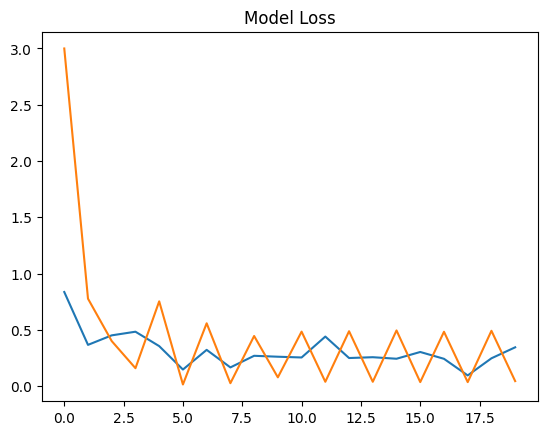

In [3]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")

Text(0.5, 1.0, 'Model Accuracy')

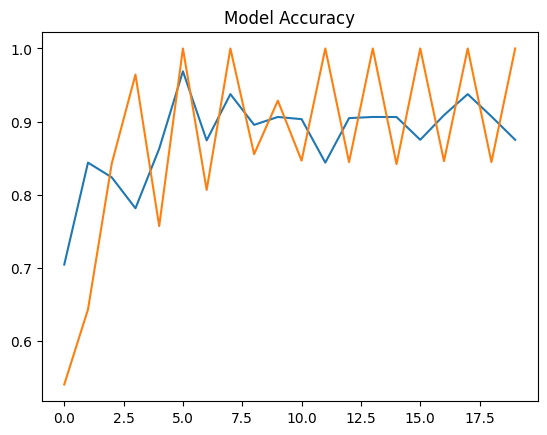

In [4]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")

In [5]:
# svaing model
model_json=model.to_json()
with open("model_a.json","w")as json_file:
    json_file.write(model_json)